# Dataset Heart - Disease
### This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

## Attribute documentation:
### age: in years
### sex: sex (1 = male; 0 = female)
### cp: chest pain type
### trestbps: resting blood pressure (in mm Hg on admission to the hospital)
### chol: serum cholestoral in mg/dl
### fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
### restecg: resting electrocardiographic results (0= normal, 1=having ST-T wave abnormality, 2= ventricular hypertrophy)
### thalach: maximum heart rate achieved
### exang: exercise induced angina (1 = yes; 0 = no)
### oldpeak: ST depression induced by exercise relative to rest
### slope:  the slope of the peak exercise ST segment
### ca: number of major vessels (0-3) colored by flourosopy
### thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
### num: diagnosis of heart disease (angiographic disease status) 
### -- Value 0: < 50% diameter narrowing
### -- Value 1: > 50% diameter narrowing

In [80]:
import pandas as pd 
import missingno as mno 
file_name ="C:/Users/ACER/Desktop/Curso DSML_UNALM/Clase_3_Supervised Learning/Actividad_Heart_Disease/processed.cleveland.txt"
names_col=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data=pd.read_csv(file_name,sep=",",header=None, names=names_col)

In [81]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [82]:
data.dtypes # Explorando el tipo de data que existe en la data

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [ ]:
### Cambiando los object por valores numéricos: float64 | int64

In [83]:
data['ca'] = pd.to_numeric(data['ca'],errors='coerce')
data['thal'] = pd.to_numeric(data['thal'],errors='coerce') 
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

## Exploración de NaN

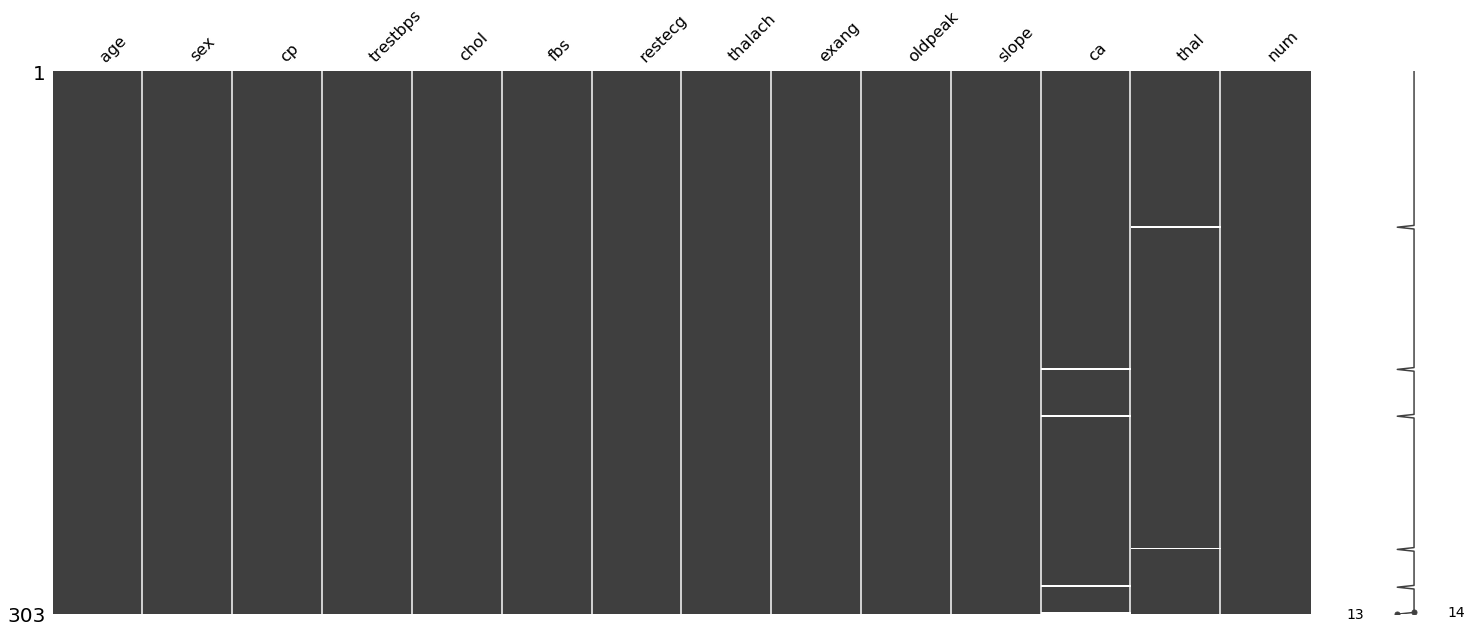

In [84]:
mno.matrix(data) # Usando un mapeo rápido

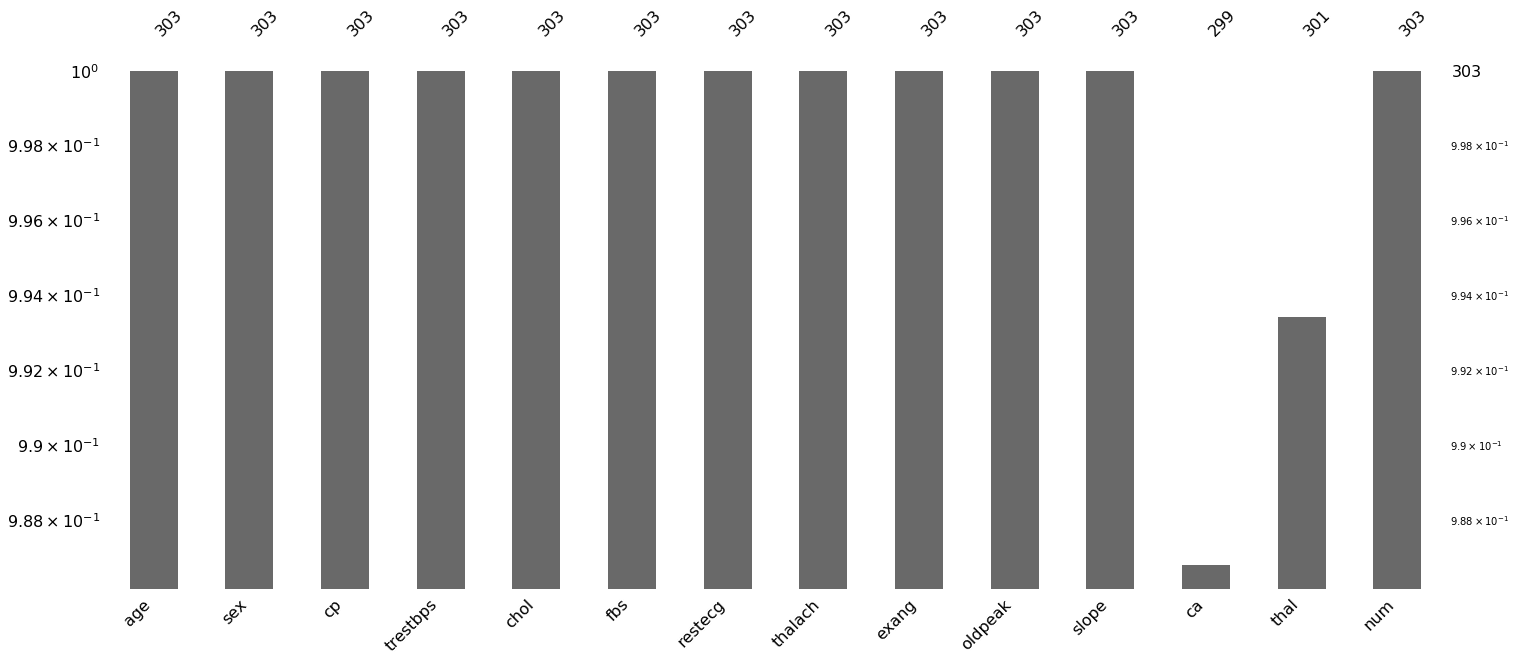

In [85]:
mno.bar(data, log=True) # Usando un gráfico de barras para evaluar quién tiene más valres NaN

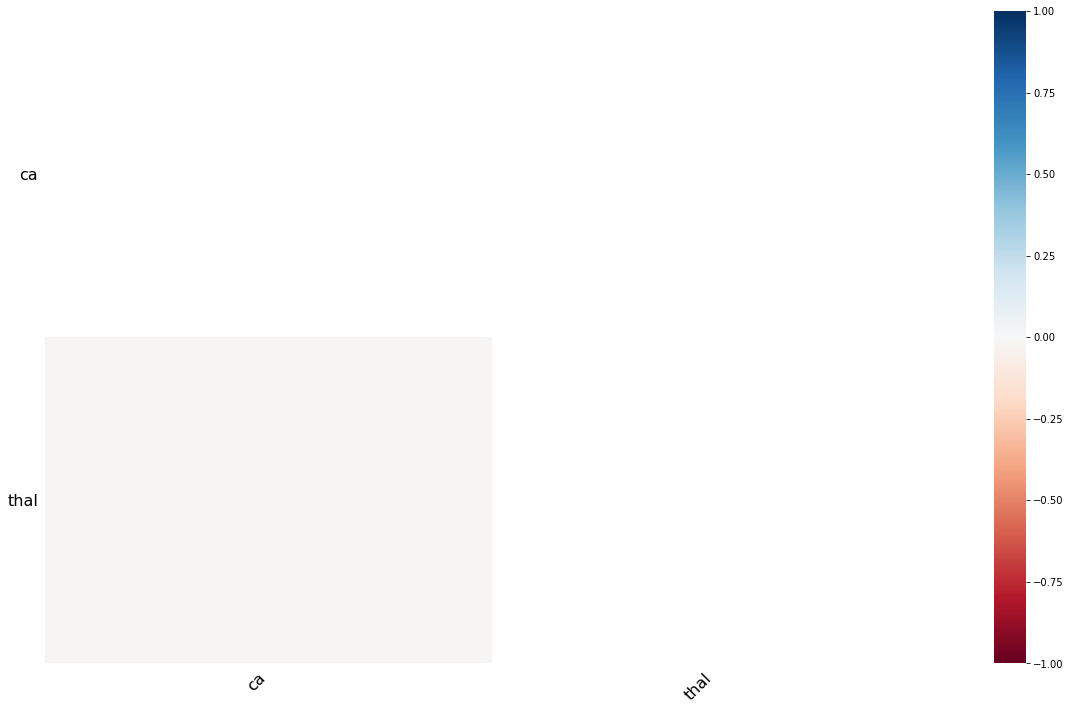

In [86]:
mno.heatmap(data) #Encontrando la correlación entre las variables NaN

In [87]:
data.isnull().sum()# Encontrando la cantidad de valores NaN

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

### Análisis de valores extremos (Outlayers)

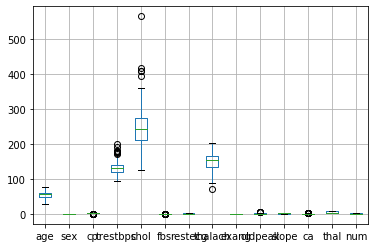

In [88]:
data.plot.box(grid="Tape") #Uso de una caja de bigotes para identificar las variables con outlayers

### Como los NaN son menos al 5% de la cantidad de variables y debido a la que no presentan Outlayers 

In [89]:
data["ca"].fillna(data["ca"].mean())

0      0.000000
1      3.000000
2      2.000000
3      0.000000
4      0.000000
         ...   
298    0.000000
299    2.000000
300    1.000000
301    1.000000
302    0.672241
Name: ca, Length: 303, dtype: float64

In [91]:
data["thal"].fillna(data["thal"].mean())

0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: float64

## Evaluando los Outlayers

In [92]:
import numpy as np
#valor outlier
iqr = data["chol"].quantile(0.75) - data["chol"].quantile(0.25) #Rango Intercuartílico 
print(data["chol"].quantile(0.75) - data["chol"].quantile(0.25))
data["flg_out"]=(data["chol"]< np.percentile(data["chol"], 25)-1.5*iqr) | (data["chol"]> np.percentile(data["chol"], 75)+1.5*iqr)
#Se agregó una columna para determinar si el valor es un outlayer para la variable más externa. IQR con 3
data[data["flg_out"]==True]

64.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flg_out
48,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0,True
121,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4,True
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0,True
173,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0,True
181,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2,True


### Usando puntuación Z

In [93]:
from sklearn import preprocessing #Importando la librería de preprocesamiento 
#processing.scale sirve para centrar los valores array cero pero mantiene la misma magnitud de la varianza (disminuye la escala)
#pero mantiene la misma distribución
p1=preprocessing.scale(data["chol"]) #Preprocesando los valores float outlayer de las variables que tienen outlayers
data["flg_out2"]=abs(p1)>2 #agregando la condición booleana si p1
data[data["flg_out2"]==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flg_out,flg_out2
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,False,True
38,55.0,1.0,4.0,132.0,353.0,0.0,0.0,132.0,1.0,1.2,2.0,1.0,7.0,3,False,True
48,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0,True,True
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0,False,True
93,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0,False,True
121,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4,True,True
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0,True,True
173,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0,True,True
181,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2,True,True
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0,0,False,True


### Uso de estimadores más robustos

In [105]:
from scipy.spatial.distance import mahalanobis
import scipy as sp #algoritmos matemáticos
import pandas as pd #para los array o data frame
import matplotlib.pyplot as plt 

In [95]:
data2=data.iloc[:, 0:14] #Guardadndo solo los float64 en una data alternativa (data2)
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [96]:
data2.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [97]:
x = data2 #variable de entrada

#matriz de covarianzas
Sx = x.cov().values 
#inversa de la matriz de covarianzas
Sx = sp.linalg.inv(Sx)

mean = x.mean().values #Valores medios

### Uso del método de Mahalanobis

In [98]:
def mahalanobisR(X,meanCol,IC):
    m = [] 
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)

mR = pd.DataFrame(mahalanobisR(x,mean,Sx), columns = ['mR'])
data['mr']=mR

In [100]:
data['index'] = data.index
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flg_out,flg_out2,mr,index
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,False,False,20.875857,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,False,False,19.920581,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,False,False,12.424304,2
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,False,False,24.225133,3
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,False,False,11.956358,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,False,False,16.738787,298
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,False,False,18.397222,299
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,False,True,12.118464,300
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,False,False,11.367610,301


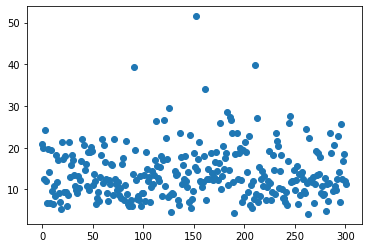

In [106]:
plt.scatter(data["index"],data['mr']) #Graficando la dispersión de los Outlayers resaltados por Mahalanobis

In [107]:
data[data["mr"]>50] #La presencia solo de un outlayer igual que por el método de la definición matemática de los outlayers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flg_out,flg_out2,mr,index
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0,True,True,51.503153,152


## Escalamiento y transformación de datos 
### Como no hay valores categóricos se procede a la transformación para normalizar los valores de los outlayers de "chol"

### Normalización Z-score

In [108]:

from sklearn import preprocessing
data["chol_ZS"]=preprocessing.scale(data["chol"])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flg_out,flg_out2,mr,index,chol_ZS
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,False,False,20.875857,0,-0.264900
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,False,False,19.920581,1,0.760415
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,False,False,12.424304,2,-0.342283
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,False,False,24.225133,3,0.063974
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,False,False,11.956358,4,-0.825922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,False,False,16.738787,298,0.334813
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,False,False,18.397222,299,-1.038723
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,False,True,12.118464,300,-2.238149
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,False,False,11.367610,301,-0.206864



### Normalización Min Max

In [109]:
#[a,b] [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

A = scaler.fit_transform(data[["chol"]])

data["chol_MM"]=pd.DataFrame(data=A)
data["chol_MM"].max()

0.9999999999999998

### Escalamiento decimal

In [110]:
maxvect=max(abs(data["chol"]))
maxvect

564.0

In [111]:
import math
kvector=math.floor(math.log10(maxvect))
kvector=kvector+1

In [112]:
scalefactor = 10**kvector
scalefactor

1000

In [114]:
data["chol_ED"]=data["chol"]/scalefactor

In [115]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,flg_out,flg_out2,mr,index,chol_ZS,chol_MM,chol_ED
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,0.0,6.0,0,False,False,20.875857,0,-0.264900,0.244292,0.233
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,3.0,3.0,2,False,False,19.920581,1,0.760415,0.365297,0.286
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,2.0,7.0,1,False,False,12.424304,2,-0.342283,0.235160,0.229
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,0.0,3.0,0,False,False,24.225133,3,0.063974,0.283105,0.250
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,0.0,3.0,0,False,False,11.956358,4,-0.825922,0.178082,0.204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,...,0.0,7.0,1,False,False,16.738787,298,0.334813,0.315068,0.264
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,...,2.0,7.0,2,False,False,18.397222,299,-1.038723,0.152968,0.193
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,...,1.0,7.0,3,False,True,12.118464,300,-2.238149,0.011416,0.131
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,...,1.0,3.0,1,False,False,11.367610,301,-0.206864,0.251142,0.236


### Normalización Sofmax

In [116]:
import numpy as np
A = preprocessing.scale(data["chol"])
M=pd.DataFrame(data=A,columns=["A"])
M
M["A"]=M["A"]*-1
M
N=1/(1+np.exp(M["A"]))
data["chol_SM"]=N
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,num,flg_out,flg_out2,mr,index,chol_ZS,chol_MM,chol_ED,chol_SM
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,6.0,0,False,False,20.875857,0,-0.264900,0.244292,0.233,0.434159
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,3.0,2,False,False,19.920581,1,0.760415,0.365297,0.286,0.681444
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,7.0,1,False,False,12.424304,2,-0.342283,0.235160,0.229,0.415255
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,3.0,0,False,False,24.225133,3,0.063974,0.283105,0.250,0.515988
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,3.0,0,False,False,11.956358,4,-0.825922,0.178082,0.204,0.304508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,...,7.0,1,False,False,16.738787,298,0.334813,0.315068,0.264,0.582930
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,...,7.0,2,False,False,18.397222,299,-1.038723,0.152968,0.193,0.261396
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,...,7.0,3,False,True,12.118464,300,-2.238149,0.011416,0.131,0.096377
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,...,3.0,1,False,False,11.367610,301,-0.206864,0.251142,0.236,0.448468


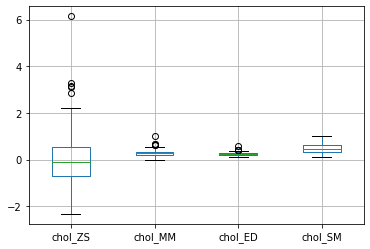

In [120]:
data.iloc[:,18:].plot.box(grid='True') #grid='True'
#Cuál uso? Para un modelamiento robusto --> El chol_SM

## Factores de igual frecuencia

In [121]:
from feature_engine import discretisers as dsc
disc = dsc.EqualFrequencyDiscretiser(q=10, variables=['chol']) #Discretizador de igual frecuencia (en  10 grupos)
disc.fit(data) #
data_t= disc.transform(data)
data_t["N"]=1 #Contador
data_t

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,num,flg_out,flg_out2,mr,index,chol_ZS,chol_MM,chol_ED,chol_SM,N
0,63.0,1.0,1.0,145.0,4,1.0,2.0,150.0,0.0,2.3,...,0,False,False,20.875857,0,-0.264900,0.244292,0.233,0.434159,1
1,67.0,1.0,4.0,160.0,7,0.0,2.0,108.0,1.0,1.5,...,2,False,False,19.920581,1,0.760415,0.365297,0.286,0.681444,1
2,67.0,1.0,4.0,120.0,3,0.0,2.0,129.0,1.0,2.6,...,1,False,False,12.424304,2,-0.342283,0.235160,0.229,0.415255,1
3,37.0,1.0,3.0,130.0,5,0.0,0.0,187.0,0.0,3.5,...,0,False,False,24.225133,3,0.063974,0.283105,0.250,0.515988,1
4,41.0,0.0,2.0,130.0,1,0.0,2.0,172.0,0.0,1.4,...,0,False,False,11.956358,4,-0.825922,0.178082,0.204,0.304508,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,6,0.0,0.0,132.0,0.0,1.2,...,1,False,False,16.738787,298,0.334813,0.315068,0.264,0.582930,1
299,68.0,1.0,4.0,144.0,1,1.0,0.0,141.0,0.0,3.4,...,2,False,False,18.397222,299,-1.038723,0.152968,0.193,0.261396,1
300,57.0,1.0,4.0,130.0,0,0.0,0.0,115.0,1.0,1.2,...,3,False,True,12.118464,300,-2.238149,0.011416,0.131,0.096377,1
301,57.0,0.0,2.0,130.0,4,0.0,2.0,174.0,0.0,0.0,...,1,False,False,11.367610,301,-0.206864,0.251142,0.236,0.448468,1


In [122]:
double_group = data_t.groupby(["chol"])

#double_group = data_t.groupby(["DM","Y"])
double_group.sum()[["N"]] #Sumar el contador

,N
chol,
0,31
1,31
2,30
3,30
4,30
5,32
6,28
7,31
8,29


### Factores de igual amplitud de intervalos

In [124]:
data["chol_OR"]=data["chol"] #Se guarda la data DM en otra variable (Columna) añadida
disc = dsc.EqualWidthDiscretiser(bins=10, variables=['chol']) #Se crean discretizadores de igual tamaño (en grupos de 10) coon las variables de "chol"
disc.fit(data) #
data_t2= disc.transform(data) #transforma la data de disc
data_t2["N"]=1
data_t2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,flg_out,flg_out2,mr,index,chol_ZS,chol_MM,chol_ED,chol_SM,chol_OR,N
0,63.0,1.0,1.0,145.0,2,1.0,2.0,150.0,0.0,2.3,...,False,False,20.875857,0,-0.264900,0.244292,0.233,0.434159,233.0,1
1,67.0,1.0,4.0,160.0,3,0.0,2.0,108.0,1.0,1.5,...,False,False,19.920581,1,0.760415,0.365297,0.286,0.681444,286.0,1
2,67.0,1.0,4.0,120.0,2,0.0,2.0,129.0,1.0,2.6,...,False,False,12.424304,2,-0.342283,0.235160,0.229,0.415255,229.0,1
3,37.0,1.0,3.0,130.0,2,0.0,0.0,187.0,0.0,3.5,...,False,False,24.225133,3,0.063974,0.283105,0.250,0.515988,250.0,1
4,41.0,0.0,2.0,130.0,1,0.0,2.0,172.0,0.0,1.4,...,False,False,11.956358,4,-0.825922,0.178082,0.204,0.304508,204.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,3,0.0,0.0,132.0,0.0,1.2,...,False,False,16.738787,298,0.334813,0.315068,0.264,0.582930,264.0,1
299,68.0,1.0,4.0,144.0,1,1.0,0.0,141.0,0.0,3.4,...,False,False,18.397222,299,-1.038723,0.152968,0.193,0.261396,193.0,1
300,57.0,1.0,4.0,130.0,0,0.0,0.0,115.0,1.0,1.2,...,False,True,12.118464,300,-2.238149,0.011416,0.131,0.096377,131.0,1
301,57.0,0.0,2.0,130.0,2,0.0,2.0,174.0,0.0,0.0,...,False,False,11.367610,301,-0.206864,0.251142,0.236,0.448468,236.0,1


chol_OR
chol         
0      1847.0
1     14199.0
2     24999.0
3     19050.0
4     11395.0
5      1067.0
6      1627.0
9       564.0
564.0
        N
chol     
0      12
1      72
2     106
3      69
4      36
5       3
6       4
9       1


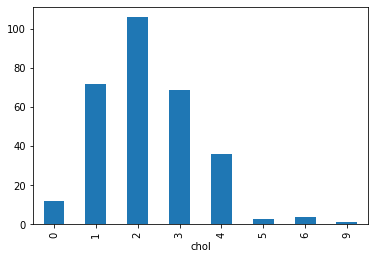

In [125]:
double_group = data_t2.groupby(["chol"])
double_group.sum()
print(double_group.sum()[["chol_OR"]])
print(max(data["chol_OR"]))
print(double_group.sum()[["N"]])
data_t2.groupby('chol')['chol'].count().plot.bar() #Tabla de frecuencias de los contenidos 

## ÁRBOLES DE DECISIÓN PARA EVALUAR 

In [127]:
X_train=data[["chol","num"]]
data['Y_2'] = pd.factorize(data["num"])[0]
y_train=data["Y_2"]

In [128]:
disc = dsc.DecisionTreeDiscretiser(cv=3,
                              scoring='neg_mean_squared_error',
                              variables=['chol'],
                              regression=True)

# fit the transformer
disc.fit(X_train, y_train)

# transform the data
data_t3= disc.transform(X_train)

In [131]:
data_t3
data["chol_3"]=data_t3["chol"]
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,flg_out2,mr,index,chol_ZS,chol_MM,chol_ED,chol_SM,chol_OR,Y_2,chol_3
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,...,False,20.875857,0,-0.264900,0.244292,0.233,0.434159,233.0,0,0.901345
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,...,False,19.920581,1,0.760415,0.365297,0.286,0.681444,286.0,1,1.275000
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,...,False,12.424304,2,-0.342283,0.235160,0.229,0.415255,229.0,2,0.901345
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,...,False,24.225133,3,0.063974,0.283105,0.250,0.515988,250.0,0,0.901345
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,...,False,11.956358,4,-0.825922,0.178082,0.204,0.304508,204.0,0,0.901345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,...,False,16.738787,298,0.334813,0.315068,0.264,0.582930,264.0,2,0.901345
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,...,False,18.397222,299,-1.038723,0.152968,0.193,0.261396,193.0,1,0.901345
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,...,True,12.118464,300,-2.238149,0.011416,0.131,0.096377,131.0,3,0.901345
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,...,False,11.367610,301,-0.206864,0.251142,0.236,0.448468,236.0,2,0.901345


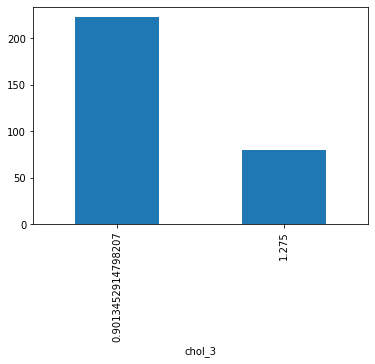

In [132]:
double_group = data.groupby(["chol_3"])
double_group.sum()
#print(double_group.sum()[["DM_OR"]])
#print(max(data["DM_OR"]))
#print(double_group.sum()[["N"]])
data.groupby('chol_3')['chol_3'].count().plot.bar()

## Transformación de variables

### Transformación Logarítmica

In [133]:
from feature_engine import variable_transformers as vt
# Crear la variable ajustadora
tf = vt.LogTransformer(variables = ['chol'])

# fit el transformador
tf.fit(data)

# transformando la data
data_t4= tf.transform(data)
data_t4



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,flg_out2,mr,index,chol_ZS,chol_MM,chol_ED,chol_SM,chol_OR,Y_2,chol_3
0,63.0,1.0,1.0,145.0,5.451038,1.0,2.0,150.0,0.0,2.3,...,False,20.875857,0,-0.264900,0.244292,0.233,0.434159,233.0,0,0.901345
1,67.0,1.0,4.0,160.0,5.655992,0.0,2.0,108.0,1.0,1.5,...,False,19.920581,1,0.760415,0.365297,0.286,0.681444,286.0,1,1.275000
2,67.0,1.0,4.0,120.0,5.433722,0.0,2.0,129.0,1.0,2.6,...,False,12.424304,2,-0.342283,0.235160,0.229,0.415255,229.0,2,0.901345
3,37.0,1.0,3.0,130.0,5.521461,0.0,0.0,187.0,0.0,3.5,...,False,24.225133,3,0.063974,0.283105,0.250,0.515988,250.0,0,0.901345
4,41.0,0.0,2.0,130.0,5.318120,0.0,2.0,172.0,0.0,1.4,...,False,11.956358,4,-0.825922,0.178082,0.204,0.304508,204.0,0,0.901345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,5.575949,0.0,0.0,132.0,0.0,1.2,...,False,16.738787,298,0.334813,0.315068,0.264,0.582930,264.0,2,0.901345
299,68.0,1.0,4.0,144.0,5.262690,1.0,0.0,141.0,0.0,3.4,...,False,18.397222,299,-1.038723,0.152968,0.193,0.261396,193.0,1,0.901345
300,57.0,1.0,4.0,130.0,4.875197,0.0,0.0,115.0,1.0,1.2,...,True,12.118464,300,-2.238149,0.011416,0.131,0.096377,131.0,3,0.901345
301,57.0,0.0,2.0,130.0,5.463832,0.0,2.0,174.0,0.0,0.0,...,False,11.367610,301,-0.206864,0.251142,0.236,0.448468,236.0,2,0.901345


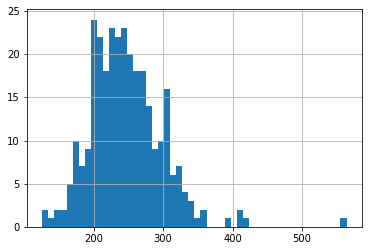

In [134]:
# variable sin transformación
data['chol'].hist(bins=50)

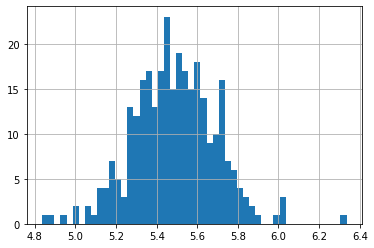

In [136]:
# variable transformada
data_t4['chol'].hist(bins=50)

## Transformación exponecial

In [137]:
from feature_engine import variable_transformers as vt

# set up the variable transformer
tf = vt.PowerTransformer(variables = ['chol'], exp=0.5)

# fit the transformer
tf.fit(data)

# transform the data
data_t5= tf.transform(data)

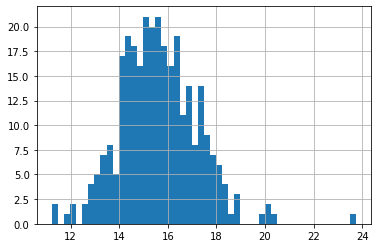

In [138]:
# variable transformada
data_t5['chol'].hist(bins=50)

## Transformación Box Cox
### Una transformación de Box-Cox de los datos de su proceso puede ayudar a corregir las siguientes condiciones: Los datos del proceso no están distribuidos normalmente y problemas de heterocedasticidad (la varianza de los errores no es constante)

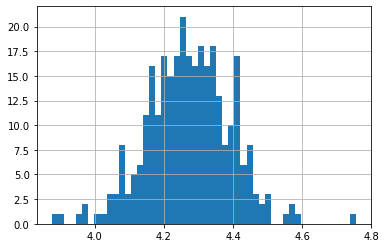

In [139]:
tf = vt.BoxCoxTransformer(variables = ['chol'])


tf.fit(data)


data_t5= tf.transform(data)


#box cox variable
data_t5['chol'].hist(bins=50)

## YeoJohnsonTransformer

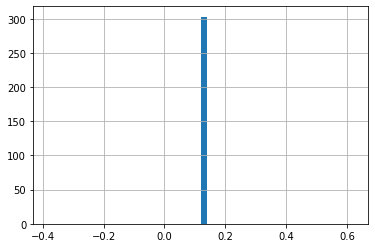

In [147]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['chol'])

# fit the transformer
tf.fit(data)

#Learns the optimal lambda for the Yeo-Johnson transformation.

# transform the data
data_t6= tf.transform(data)


# un-transformed variable
data_t6['chol'].hist(bins=50)